# Итоговый проект.

Анализ личности клиента — это подробный анализ клиентов компании. Он помогает компании лучше понять своих клиентов и облегчает изменение продукции в соответствии со специфическими потребностями, поведением различных типов клиентов.

Анализ личности клиента помогает компании модифицировать свой продукт в соответствии с целевыми потребителями из различных сегментов потребителей. Например, вместо того, чтобы тратить деньги на маркетинг нового продукта для каждого клиента в базе данных компании, компания может проанализировать, какой сегмент клиентов с наибольшей вероятностью купит продукт, и затем продвигать продукт только для этого сегмента.

Описание столбцов:

|Название| Описание |
|--|--|
|ID| Уникальный идентификатор клиента|
|Year_Birth| Год рождения клиента|
|Education | Уровень образования клиента|
|Marital_Status| Семейное положение клиента|
|Income| Годовой доход семьи клиента|
|Kidhome| Количество детей в семье клиента|
|Teenhome| Количество подростков в домохозяйстве клиента|
|Dt_Customer| Дата регистрации клиента в компании|
|Recency| Количество дней с момента последней покупки клиента|
|Complain| 1, если клиент жаловался в течение последних 2 лет, 0 —  в противном случае|
|MntWines|  Сумма, потраченная на вино за последние 2 года|
|MntFruits| Сумма, потраченная на фрукты за последние 2 года|
|MntMeatProducts| Сумма, потраченная на мясо за последние 2 года|
|MntFishProducts| Сумма, потраченная на рыбу за последние 2 года|
|MntSweetProducts| Сумма, потраченная на сладости за последние 2 года|
|MntGoldProds| Сумма, потраченная на золото за последние 2 года|
|NumDealsPurchases| Количество покупок, совершенных со скидкой|
|AcceptedCmp1| 1, если клиент принял предложение в 1-й кампании, 0 — иначе|
|AcceptedCmp2| 1, если клиент принял предложение во 2-й компании, 0 — иначе|
|AcceptedCmp3| 1, если клиент принял предложение в 3-й кампании, 0 — иначе|
|AcceptedCmp4| 1, если клиент принял предложение в 4-й кампании, 0 — иначе|
|AcceptedCmp5| 1, если клиент принял предложение в 5-й кампании, 0 — иначе|
|Response| 1, если клиент принял предложение в последней кампании, 0 — иначе|
|NumWebPurchases| Количество покупок, совершенных через веб-сайт компании|
|NumCatalogPurchases| Количество покупок, сделанных с помощью каталога|
|NumStorePurchases| Количество покупок, сделанных непосредственно в магазинах|
|NumWebVisitsMonth| Количество посещений веб-сайта компании за последний месяц|

## Задание

Проведите полный цикл анализа данных (EDA), что проходили ранее. Этапы выполнения задания (наш pipeline):

1. Загрузка и предобработка данных. Очистить данные и удалить/заполнить пропуски.
2. Описательный анализ данных, просмотр данных и вывод статистик
3. Постройте необходимые графики для анализа
4. Проверьте гипотезы
5. Сделайте отчет-вывод по исследованию

Что хочет узнать заказчик?

1. Сколько в среднем клиенты тратят на каждый тип товара? На какой товар надо сделать акцент?
2. Какой средний возраст покупателя? Зависит ли возраст клиента от его покупок во всех категориях?
3. Тратят ли клиент больше денег, если у него много детей и иждивенцев?
4. Зависят ли покупки от образования? Что предпочитают люди чаще покупать в зависимости от образования?
5. Женатые люди тратят больше или меньше денег на покупку золота?
6. Люди, которые покупают товар на сайте чаще берут что-то со скидкой?
7. Зависит ли жалоба клиента от его трат?
8. Люди, принявшие предложение о покупке лишь в последней компании тратят больше, чем люди, принявшие сразу предложение первой компании?

**ЗАДАНИЕ ПРО**

1. Разбейте данные на несколько выборок: по образованию, по уровню заработка и по семейному статусу. Опишите все эти выборки и скажите — отличаются ли они между собой? Опишите общие закономерности для каждого типа — на что чаще тратит женатый человек и жалуется ли он? Люди с PhD покупают фрукты? И тд
2. Разбейте данные на две выборки — по сумме трат каждого товара: 1 — больше медианы трат, 0— меньше. Сравните выборки между собой и сделайте вывод — на кого надо опираться при модификации товаров магазинам?
3. Проведите дополнительный анализ, который поможет дать больше информации для заказчика.

## Загрузка данных

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df = pd.read_csv('./marketing_campaign.csv', sep='\t')

Посмотрим на пропуски в данных. Пропуски имеются в колонках:

1. Income   float64 -- 24 пропуска;

Заполним эти пропуски медианным значением.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df['Income'] = df['Income'].fillna(df['Income'].median())
df.isna().sum().sum()

0

## Описательный анализ данных

Рассмотрите данные — изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

In [5]:
df.describe().iloc[:, :10]

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts
count,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00
mean,5592.16,1968.81,52237.98,0.44,0.51,49.11,303.94,26.30,166.95,37.53
std,3246.66,11.98,25037.96,0.54,0.54,28.96,336.60,39.77,225.72,54.63
min,0.00,1893.00,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2828.25,1959.00,35538.75,0.00,0.00,24.00,23.75,1.00,16.00,3.00
50%,5458.50,1970.00,51381.50,0.00,0.00,49.00,173.50,8.00,67.00,12.00
75%,8427.75,1977.00,68289.75,1.00,1.00,74.00,504.25,33.00,232.00,50.00
max,11191.00,1996.00,666666.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00


In [6]:
df.describe().iloc[:, 10:17]

,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00
mean,27.06,44.02,2.33,4.08,2.66,5.79,5.32
std,41.28,52.17,1.93,2.78,2.92,3.25,2.43
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,9.00,1.00,2.00,0.00,3.00,3.00
50%,8.00,24.00,2.00,4.00,2.00,5.00,6.00
75%,33.00,56.00,3.00,6.00,4.00,8.00,7.00
max,263.00,362.00,15.00,27.00,28.00,13.00,20.00


In [7]:
df.describe().iloc[:, 17:]

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00
mean,0.07,0.07,0.07,0.06,0.01,0.01,3.00,11.00,0.15
std,0.26,0.26,0.26,0.25,0.11,0.10,0.00,0.00,0.36
min,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,3.00,11.00,1.00


In [8]:
display(df['Kidhome'].value_counts(normalize=1))
display(df['Teenhome'].value_counts(normalize=1))

Kidhome
0   0.58
1   0.40
2   0.02
Name: proportion, dtype: float64

Teenhome
0   0.52
1   0.46
2   0.02
Name: proportion, dtype: float64

In [9]:
df['Age'] = 2014 - df['Year_Birth']
display(df['Age'].describe())

count   2240.00
mean      45.19
std       11.98
min       18.00
25%       37.00
50%       44.00
75%       55.00
max      121.00
Name: Age, dtype: float64

In [10]:
df[df['Age'] > 100]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
192,7829,1900,2n Cycle,Divorced,36640.00,1,0,26-09-2013,99,15,...,0,0,0,0,0,1,3,11,0,114
239,11004,1893,2n Cycle,Single,60182.00,0,1,17-05-2014,23,8,...,0,0,0,0,0,0,3,11,0,121
339,1150,1899,PhD,Together,83532.00,0,0,26-09-2013,36,755,...,0,0,1,0,0,0,3,11,0,115


In [11]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Dt_Customer'].describe()

count                             2240
mean     2013-07-10 10:01:42.857142784
min                2012-07-30 00:00:00
25%                2013-01-16 00:00:00
50%                2013-07-08 12:00:00
75%                2013-12-30 06:00:00
max                2014-06-29 00:00:00
Name: Dt_Customer, dtype: object

1. Возраст	Последние данные о регистрации клиента относятся к 2014 году, будем для простоты считать, что данные за 2014 год;

Средний возраст клиентов 45 +- 12 лет, медианный 44 года, что указывает на примерно равномерное распределение клиентов вокруг среднего возраста; <br>
Есть 3 клиента с возрастом > 100 лет;
				
2. Доход	52237 +- 25038, медианное значение 51382, распределение близко к симметричному;

Есть выбросы с очень низкими показателями и с очень высокими;

3. Дети

У 58% клиентов нет детей, у 40% один ребёнок, у 2% 2 ребёнка;

4. Подростки

У 52% клиентов нет детей-подростков, у 46% один подросток, у 2% 2 подростка;

5. Последняя покупка

В среднем клиент соверашл последнюю покупку 49 дней назад, 75% клиентов совершали последнюю покупку 24 дня назад и раньше;

6. Траты на винную продукцию в последние 2 года

Клиенты в среднем потратили 304 +- 337 у. е. на винную продукцию, медианное значение составляет 174 у. е. что указывает на сдвиг в данных в сторону клиентов, тратящих на вино меньше среднего значения;

7. Траты на фрукты в последние 2 года

Клиенты в среднем потратили 26 +- 40 у. е. на фрукты, медианное значение 8 у. е., что указывает на сдвиг в данных в сторону клиентов, 
тратящих на фрукты меньше среднего значения;

8. Траты на мясо в последние 2 года

Клиенты в среднем потратили 167 +- 226 у. е. на мясо, медианное значение 67 у. е., что указывает на сдвиг в данных в сторону клиентов, 
тратящих на мясо меньше среднего значения;

9. Траты на рыбу в последние 2 года

Клиенты в среднем потратили 38 +- 55 у. е. на рыбу, медианное значение 12 у. е., что указывает на сдвиг в данных в сторону клиентов, 
тратящих на рыбу меньше среднего значения;

10. Траты на сладости в последние 2 года

Клиенты в среднем потратили 27 +- 41 у. е. на сладости, медианное значение 8 у. е., что указывает на сдвиг в данных в сторону клиентов, 
тратящих на сладости меньше среднего значения;

11. Траты на золото в последние 2 года

Клиенты в среднем потратили 44 +- 52 у. е. на золото, медианное значение 24 у. е., что указывает на сдвиг в данных в сторону клиентов, 
тратящих на золото меньше среднего значения;

12. Среднее количество покупок, совершённых со скидкой 2.33 +- 1.93, медианное значение 2;

13. Среднее количество покупок, совершённых по интернету 4.08 +- 2.78, медианное значение 4;

14. Среднее количество покупок, совершённых по каталогу 2.66 +- 2.92, медианное значение 2;

15. Среднее количество покупок, совершённых непосредственно в магазине 5.79 +- 3.25, медианное значение равно 5;

Можно сделать вывод, что самые популярные способы покупать товары -- непосредственно в магазине и через интернет.

16. Количество клиентов принявших предложение по кампаниям:

1-ая кампания -- 6%

2-ая кампания -- 1%

3-ая кампания -- 7%

4-ая кампания -- 7%

5-ая кампания -- 7%

Последняя кампания -- 15%

17. Колонки Z_CostContact и Z_Revenue одинаковы для всех клиентов, не могут повлиять на аналитику, поэтому будут удалены. Колонка 'Year_Birth' с годом рождения тоже будет удалена, поскольку мы заменим её на колонку 'Age'.

Всего в датасете 30 колонок, одна формата datetime64[ns], 2 колонки типа object, все остальные колонки числовые. Значения, принимаемые в колонках 'object' перечислены в таблицах ниже.

|Education| proportion |
|---------|-------|
Graduation |  0.50
PhD        |  0.22
Master     |  0.17
2n Cycle   |  0.09
Basic      |  0.02

<br>

|Marital_Status| proportion |
|---------|-------|
Married  |  0.39
Together |  0.26
Single   |  0.21
Divorced |  0.10
Widow    |  0.03
Alone    |  0.00
Absurd   |  0.00
YOLO     |  0.00

In [12]:
display(df[df['Marital_Status'] == 'Alone'])
display(df[df['Marital_Status'] == 'Absurd'])
display(df[df['Marital_Status'] == 'YOLO'])

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
131,433,1958,Master,Alone,61331.00,1,1,2013-03-10,42,534,...,0,0,0,0,0,0,3,11,0,56
138,7660,1973,PhD,Alone,35860.00,1,1,2014-05-19,37,15,...,1,0,0,0,0,0,3,11,1,41
153,92,1988,Graduation,Alone,34176.00,1,0,2014-05-12,12,5,...,0,0,0,0,0,0,3,11,0,26


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
2093,7734,1993,Graduation,Absurd,79244.00,0,0,2012-12-19,58,471,...,0,0,1,1,0,0,3,11,1,21
2134,4369,1957,Master,Absurd,65487.00,0,0,2014-01-10,48,240,...,0,0,0,0,0,0,3,11,0,57


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
2177,492,1973,PhD,YOLO,48432.00,0,1,2012-10-18,3,322,...,0,0,0,0,0,0,3,11,0,41
2202,11133,1973,PhD,YOLO,48432.00,0,1,2012-10-18,3,322,...,0,0,0,0,0,0,3,11,1,41


In [13]:
display(df.info())
df.select_dtypes('object').columns.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

None

(2,)

In [14]:
display(df['Marital_Status'].value_counts(normalize=True))
display(df['Education'].value_counts(normalize=True))

Marital_Status
Married    0.39
Together   0.26
Single     0.21
Divorced   0.10
Widow      0.03
Alone      0.00
Absurd     0.00
YOLO       0.00
Name: proportion, dtype: float64

Education
Graduation   0.50
PhD          0.22
Master       0.17
2n Cycle     0.09
Basic        0.02
Name: proportion, dtype: float64

## Предобработка данных

### Дубликаты

Предобработайте датасет — проверьте на наличие дубликатов и удалите, если они есть.

In [15]:
# Дубликаты отсутствуют
df.duplicated().sum()

0

In [16]:
'Year_Birth' in df.columns

True

### Отсутствующие значения

Предобработайте датасет — проверьте на наличие NaN и удалите или заполните значения.

In [17]:
# Пропуски в Income мы уже заполнили, удалим ненужные колонки
df = df.drop(['Z_CostContact', 'Z_Revenue', 'Year_Birth'], axis = 1)

# Удалим данные с абсурдным Marital_status
mask = (df['Marital_Status'] == 'Absurd') | (df['Marital_Status'] == 'YOLO') 
df = df.drop(index = df[mask].index)

df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Single' if x == 'Alone' else x)
df['Marital_Status'].value_counts(normalize=True)

Marital_Status
Married    0.39
Together   0.26
Single     0.22
Divorced   0.10
Widow      0.03
Name: proportion, dtype: float64

## Визуализация

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Kidhome'}>,
        <Axes: title={'center': 'Teenhome'}>,
        <Axes: title={'center': 'Dt_Customer'}>],
       [<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'MntWines'}>,
        <Axes: title={'center': 'MntFruits'}>,
        <Axes: title={'center': 'MntMeatProducts'}>,
        <Axes: title={'center': 'MntFishProducts'}>],
       [<Axes: title={'center': 'MntSweetProducts'}>,
        <Axes: title={'center': 'MntGoldProds'}>,
        <Axes: title={'center': 'NumDealsPurchases'}>,
        <Axes: title={'center': 'NumWebPurchases'}>,
        <Axes: title={'center': 'NumCatalogPurchases'}>],
       [<Axes: title={'center': 'NumStorePurchases'}>,
        <Axes: title={'center': 'NumWebVisitsMonth'}>,
        <Axes: title={'center': 'AcceptedCmp3'}>,
        <Axes: title={'center': 'AcceptedCmp4'}>,
        <Axes: title={'center': 'AcceptedCmp5'}>],

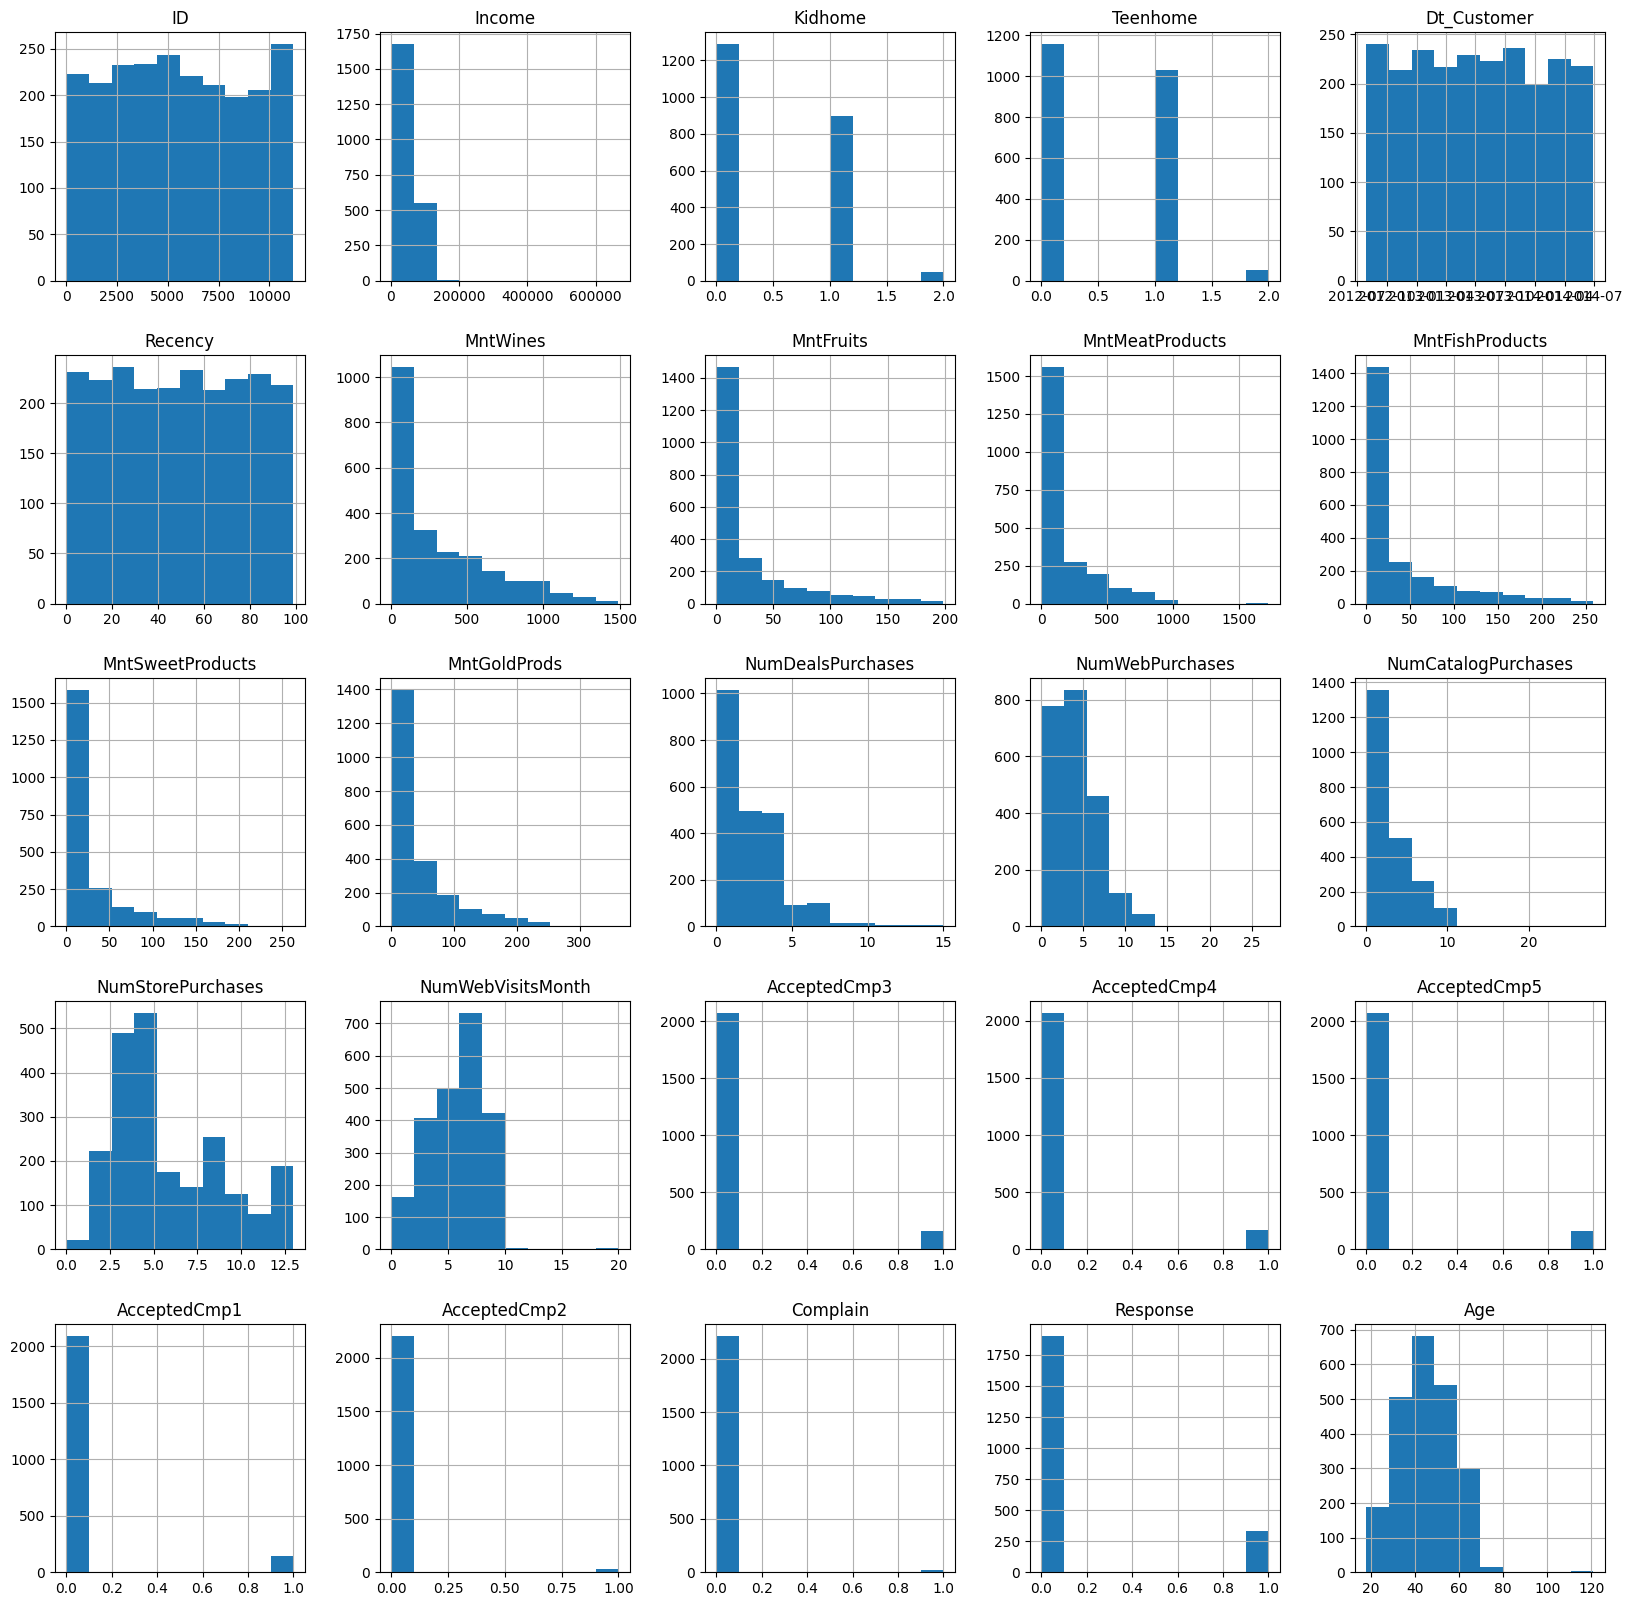

In [18]:
df.hist(figsize=(20, 20))

/tmp/ipykernel_6706/954702345.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[i].legend()
/tmp/ipykernel_6706/954702345.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[i].legend()


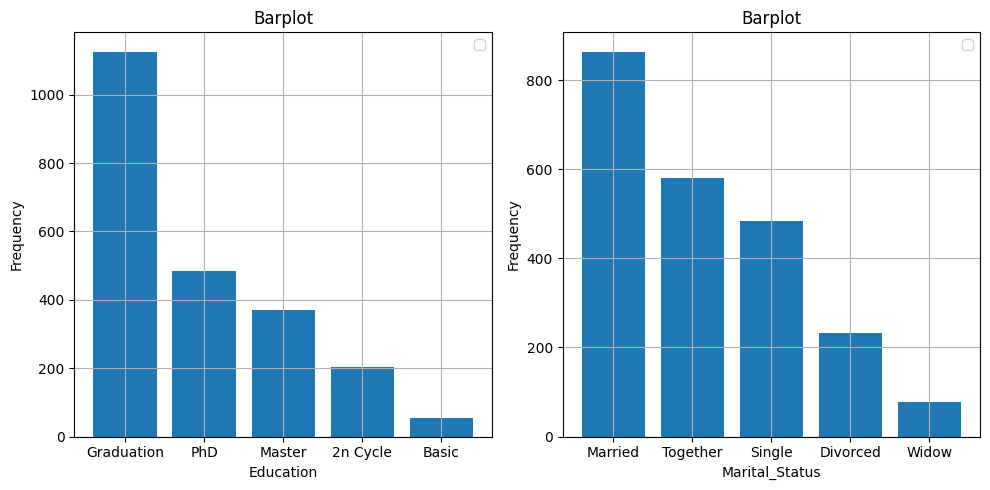

In [19]:
bar_columns = df.select_dtypes('object').columns

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs = axs.flatten()

for i, param in enumerate(bar_columns):
    axs[i].bar(df[param].value_counts().index, height = df[param].value_counts().values)
    axs[i].set_title('Barplot')
    axs[i].set_xlabel(param)
    axs[i].set_ylabel('Frequency')
    axs[i].grid()
    axs[i].legend()

plt.tight_layout()
plt.show()

**Вывод:**


Визуализация данных во многом подтверждает предыдущие выводы, а именно:

1. По параметрам Income, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds наблюдается сильное смещение в сторону значений, меньших среднего.
Логично предположить, что все перечисленные фичи коррелируют с Income, поэтому распределение клиентов компании по Income так влияет на все остальные фичи.

2. Распределение по возрасту визуально близко к нормальному.

3. Статистика посещений веб-сайта близка к нормальной.

4. Большинство клиентов состоят в браке или в отношениях.

5. Большинство клиентов имеют разные ступени высшего образования.

## Задание от заказчика

1. Сколько в среднем клиенты тратят на каждый тип товара? На какой товар надо сделать акцент?
2. Какой средний возраст покупателя? Зависит ли возраст клиента от его покупок во всех категориях?
3. Тратят ли клиент больше денег, если у него много детей и иждивенцев?
4. Зависят ли покупки от образования? Что предпочитают люди чаще покупать в зависимости от образования?
5. Женатые люди тратят больше или меньше денег на покупку золота?
6. Люди, которые покупают товар на сайте чаще берут что-то со скидкой?
7. Зависит ли жалоба клиента от его трат?
8. Люди, принявшие предложение о покупке лишь в последней компании тратят больше, чем люди, принявшие сразу предложение первой компании?

1. Сколько в среднем клиенты тратят на каждый тип товара? На какой товар надо сделать акцент?

In [20]:
# Средние траты на каждый вид товаров
df.describe().iloc[:, 6:12]

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2236.00,2236.00,2236.00,2236.00,2236.00,2236.00
mean,303.87,26.27,166.92,37.41,27.08,43.88
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,23.00,1.00,16.00,3.00,1.00,9.00
50%,173.00,8.00,67.00,12.00,8.00,24.00
75%,505.00,33.00,232.00,50.00,33.00,56.00
max,1493.00,199.00,1725.00,259.00,263.00,362.00
std,336.88,39.76,225.78,54.44,41.30,51.98


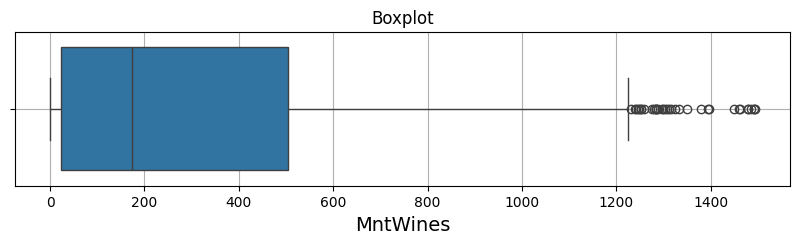

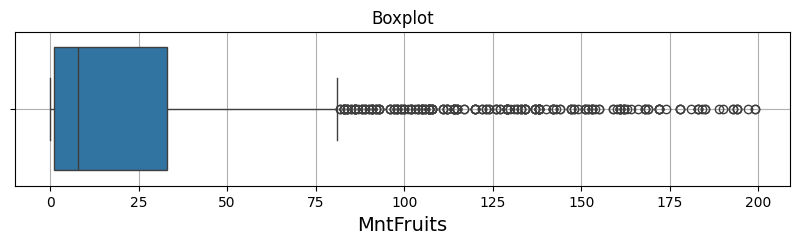

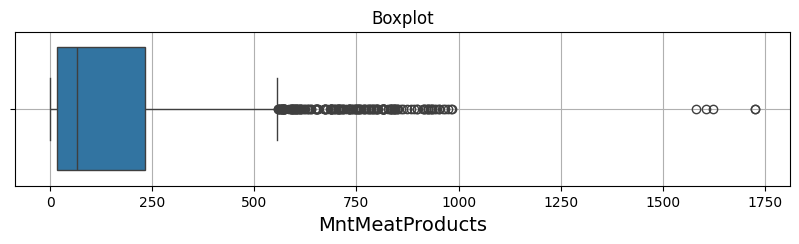

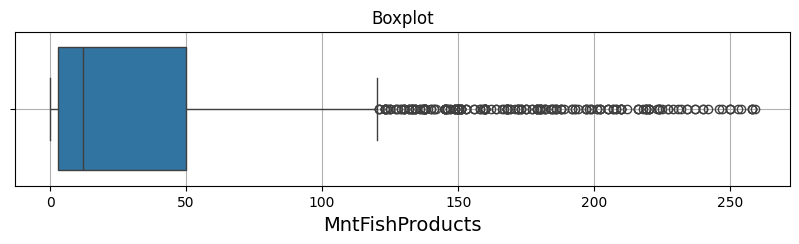

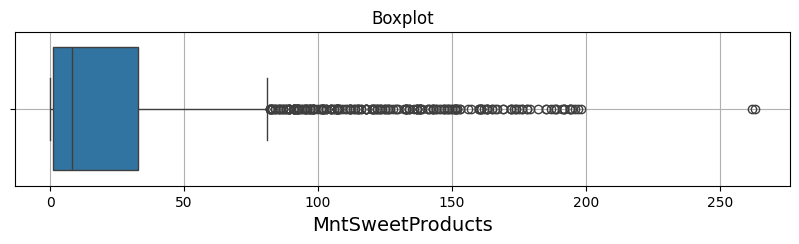

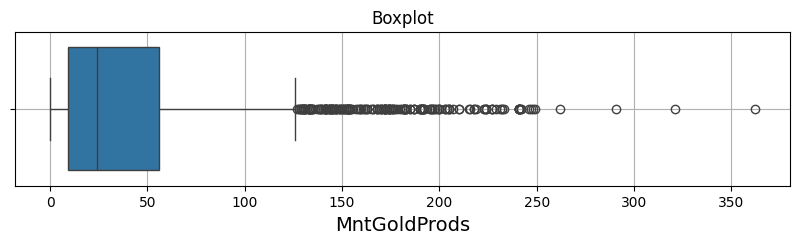

In [21]:
df_items = df.iloc[:, 8:14]

for column in df_items.columns:

    plt.figure(figsize=(10,2))
    plt.title('Boxplot')
    sns.boxplot(df[column], orient='h')
    plt.xlabel(column, fontsize = 14)
    plt.grid()
    plt.show()

In [22]:
# Хотим посчитать соотношение 25% и 75% перцентилей к среднему
df_items

avg_25 = []
avg_75 = []
avg_75_25 = []
avg_50 = []

for column in df_items:
    avg_25.append(df_items[column].quantile(0.25)/df_items[column].mean())
    avg_75.append(df_items[column].quantile(0.75)/df_items[column].mean())
    avg_50.append(df_items[column].quantile(0.50)/df_items[column].mean())
    avg_75_25.append((df_items[column].mean() - df_items[column].quantile(0.25)/df_items[column].mean())
                     /df_items[column].quantile(0.75))

pd.DataFrame(zip(avg_25, avg_50, avg_75, avg_75_25), columns=['25/avg', '50/avg', '75/avg', 'avg_75_25'], index = df_items.columns)



,25/avg,50/avg,75/avg,avg_75_25
MntWines,0.08,0.57,1.66,0.60
MntFruits,0.04,0.30,1.26,0.79
MntMeatProducts,0.10,0.40,1.39,0.72
MntFishProducts,0.08,0.32,1.34,0.75
MntSweetProducts,0.04,0.30,1.22,0.82
MntGoldProds,0.21,0.55,1.28,0.78


Пояснение столбцов:

1. 25/avg -- отношение 25% квантиля к среднему значению;
2. 50/avg -- отношение 50% квантиля к среднему значению;
3. 75/avg -- отношение 75% квантиля к среднему значению;
4. avg_75_25 -- положение среднего значения относительно 25% квантиля (0) и 75% квантиля    

Вывод 1:

Во всех категориях товаров есть выбросы в сторону 'больше', но в некоторых категориях эти выбросы расположены непрерывно, а в некоторых есть большие пробелы. Это повод исследовать подробнее структуру трат по этим категориям. Возможно есть смысл расширить линейку самых дорогих продуктов для состоятельных клиентов.

Вывод 2:

Чем меньше показатель avg_75_25 и больше 50/avg, тем охотнее люди готовы потратить на эти категории больше среднего (среди клиентов со средним чеком и среди всех клиентов соответственно). 

Среди всех клиентов, трат выше среднего больше для категорий вино и золото. Затем идёт мясо, и менее всего клиенты гоотвы тратить больше среднего на фрукты, рыбу и сладости.

Среди клиентов с умеренными тратами (между квантилями 0.25 и 0.75) платить выше среднего готовы клиенты в категориях вино, мясо и рыба. Затем идут фрукты, золото и сладости.

В соответствии с этими данными можно организовывать стратегию по выпуску новых продуктов. Например, можно корректировать продуктовую линейку в категории золото для товаров средней ценовой категории.

2. Какой средний возраст покупателя? Зависит ли возраст клиента от его покупок во всех категориях?

In [23]:
df['Age'].describe()

count   2236.00
mean      45.20
std       11.98
min       18.00
25%       37.00
50%       44.00
75%       55.00
max      121.00
Name: Age, dtype: float64

In [24]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age'],
      dtype='object')

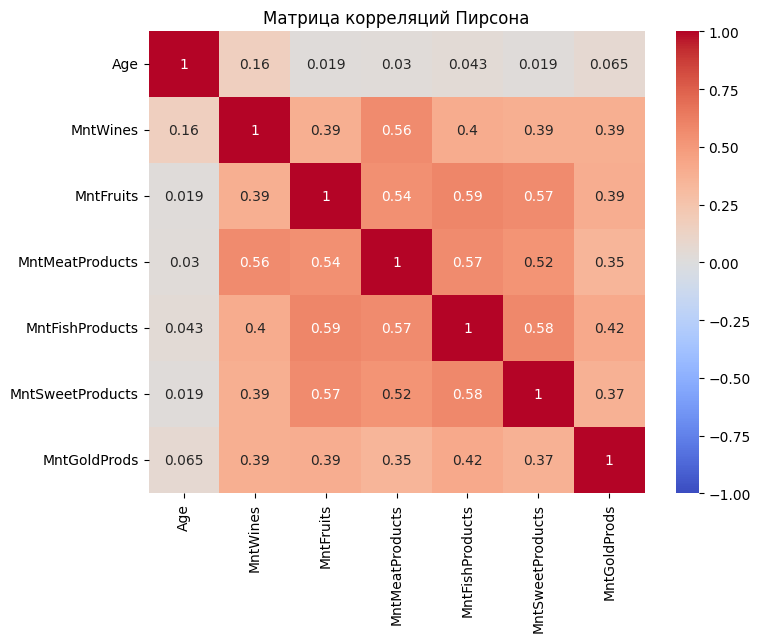

In [25]:
# Исследуем как коррелируют категориальные траты клиента в зависимости от его возраста

cat_items = ['MntWines', 'MntFruits', 
                'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

corr_matr = df[['Age', *cat_items]].corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Матрица корреляций Пирсона')
plt.show()

Имеется слабая корреляция возраста с тратами на вино, траты по остальным категориям фактически не скоррелированы. Разделим всех людей на возрастные группы:

1. 18 -- 30 лет;
2. 30 -- 50 лет;
3. 50 -- 70 лет;
4. 70 + лет

и посмотрим на структуру их трат.

In [26]:
bins = [18, 30, 50, 70, 125]
labels = ['18-30', '30-50', '50-70', '70+']

df_age = df.copy()
df_age['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)


In [27]:
df_exp_age = df_age.groupby('Age_group')[[*cat_items]].mean()
df_exp_age

/tmp/ipykernel_6706/2607375175.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_exp_age = df_age.groupby('Age_group')[[*cat_items]].mean()


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Age_group,,,,,,
18-30,244.14,29.30,192.09,38.08,30.49,44.39
30-50,273.63,24.65,150.77,34.21,25.25,40.33
50-70,372.60,27.85,183.88,41.80,28.95,49.68
70+,554.42,35.33,286.00,88.58,31.50,47.58


/tmp/ipykernel_6706/1743630235.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


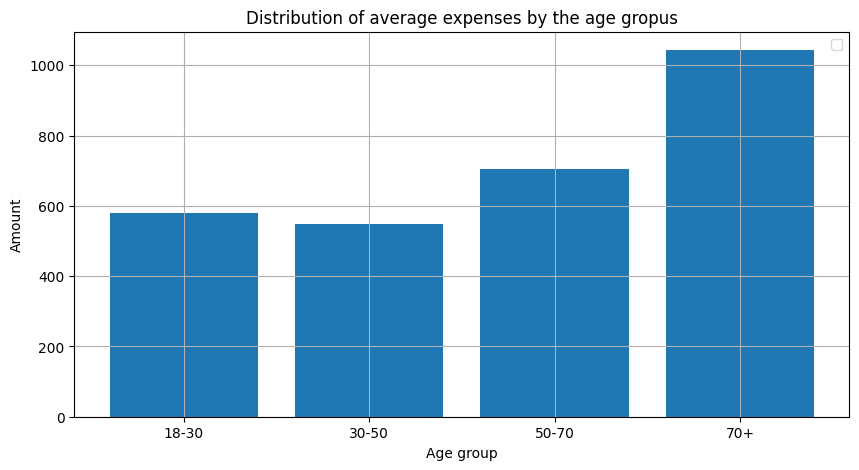

In [28]:
# Суммарные траты
df_exp_age.apply(lambda x: x.sum(), axis = 1)

plt.figure(figsize=(10, 5))
plt.bar(df_exp_age.apply(lambda x: x.sum(), axis = 1).index, df_exp_age.apply(lambda x: x.sum(), axis = 1).values)
plt.title('Distribution of average expenses by the age gropus')
plt.xlabel('Age group')
plt.ylabel('Amount')
plt.grid()
plt.legend()
plt.show()

Мы видим, что траты в возрастных группах 18-30 и 30-50 примерно совпадают, в 50-70 они больше и в категории 70+ они ещё больше. Конкретные значения представлены ниже.

In [29]:
df_exp_age.apply(lambda x: x.sum(), axis = 1)

Age_group
18-30    578.48
30-50    548.85
50-70    704.76
70+     1043.42
dtype: float64

/tmp/ipykernel_6706/995803602.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[i].legend()


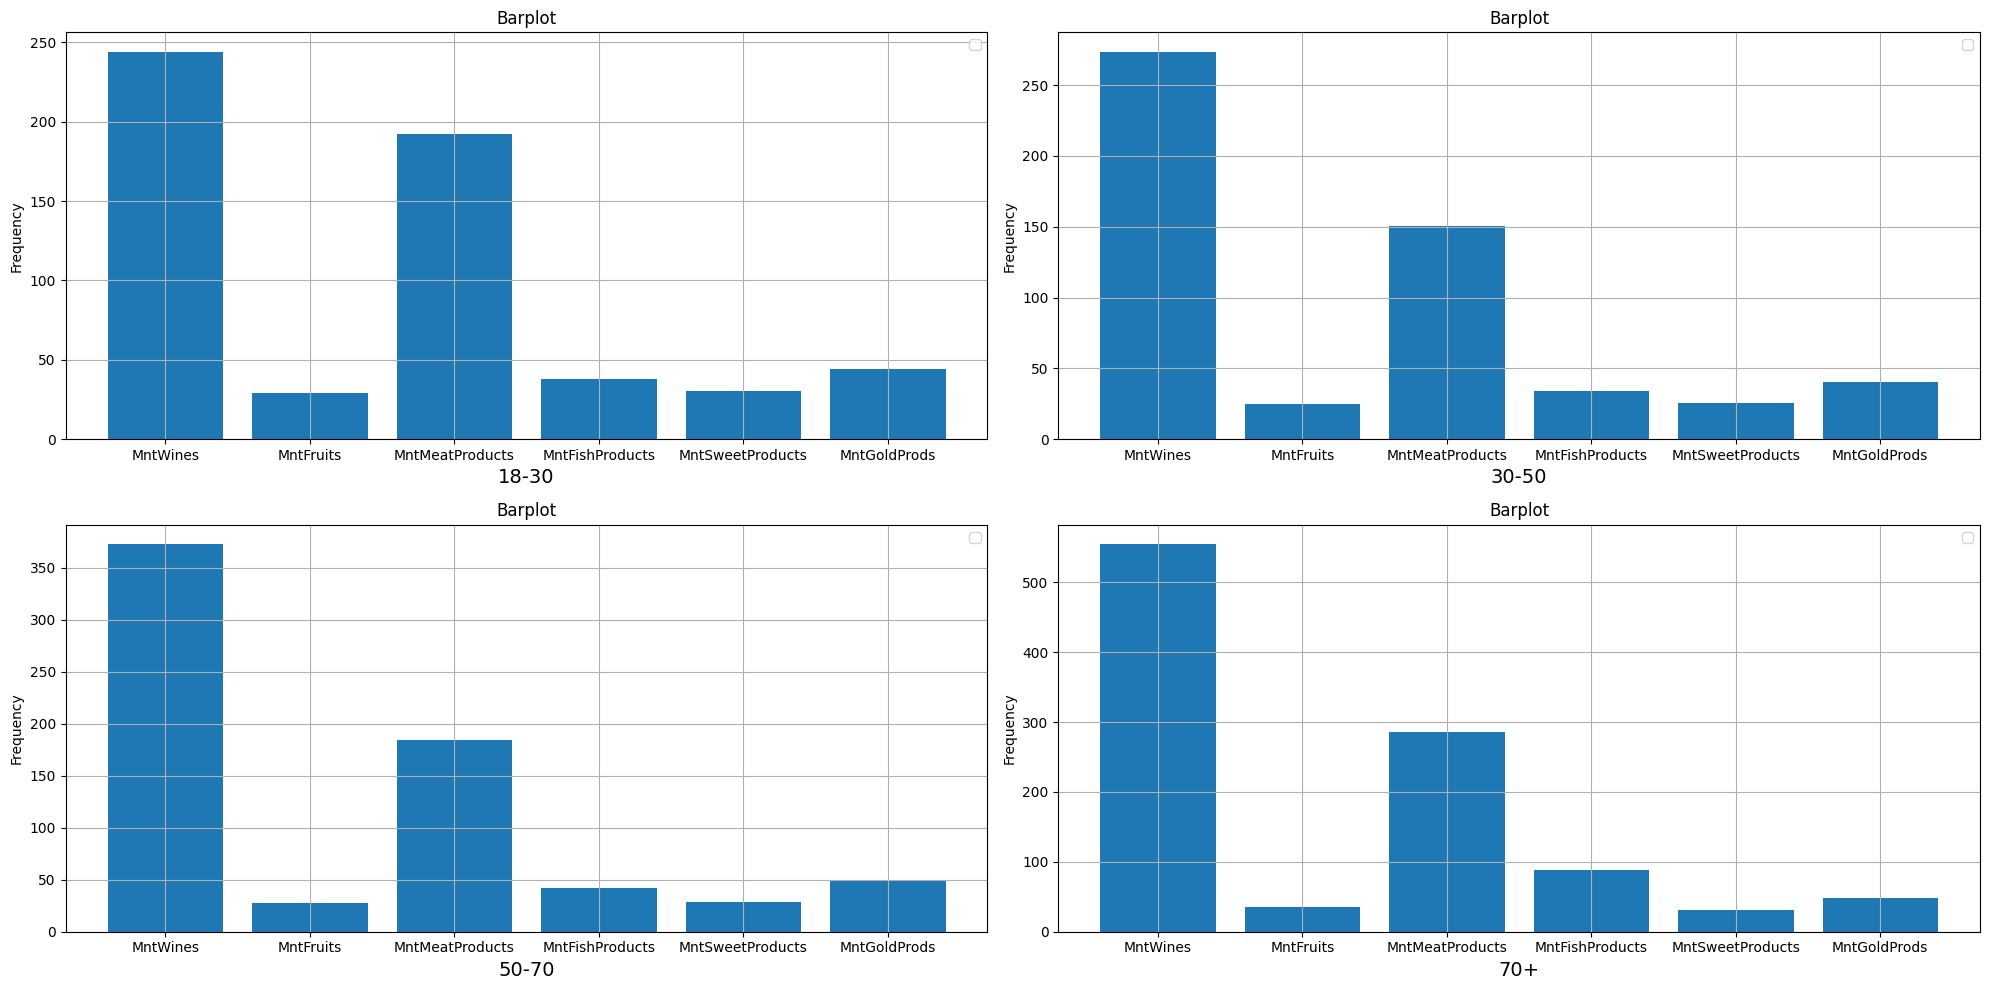

In [30]:
# Траты по категориям

fig, axs = plt.subplots(2, 2, figsize=(20, 10))
axs = axs.flatten()

for i, age_group in enumerate(labels):
    axs[i].bar(df_exp_age.loc[age_group].index, height = df_exp_age.loc[age_group].values)
    axs[i].set_title('Barplot')
    axs[i].set_xlabel(age_group, fontsize = 14)
    axs[i].set_ylabel('Frequency')
    axs[i].grid()
    axs[i].legend()

plt.tight_layout()
plt.show()

In [31]:
# Траты в процентном отношении

df_exp_age_perc = df_exp_age.apply(lambda row: row/row.sum() , axis = 1)
df_exp_age_perc

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Age_group,,,,,,
18-30,0.42,0.05,0.33,0.07,0.05,0.08
30-50,0.50,0.04,0.27,0.06,0.05,0.07
50-70,0.53,0.04,0.26,0.06,0.04,0.07
70+,0.53,0.03,0.27,0.08,0.03,0.05


Заметим, что с увеличением возрастной группы уменьшается доля сладостей, золота и фруктов и увеличивается доля вина. В возрастной категории 18-30 максимальна доля мяса, затем она практически одинаковая для всех возрастных категорий. Доля рыбной продукции с ростом возрастной категории сначала падает, а затем увеличивается.

3. Тратит ли клиент больше денег, если у него много детей и иждивенцев?

In [32]:
df_for_children = df.copy()
df_for_children['sum_exp'] = df_for_children[[*cat_items]].sum(axis = 1)
df_for_children['children'] = df_for_children['Kidhome'] + df_for_children['Teenhome']

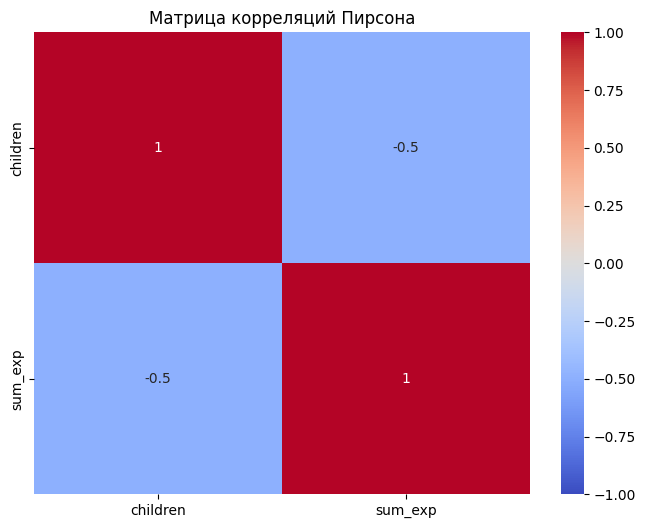

In [33]:
corr_matr = df_for_children[['children', 'sum_exp']].corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Матрица корреляций Пирсона')
plt.show()

Наблюдается обратная средняя корреляция между суммарными тратами и наличием иждивенцев. Конкретные значения предъявлены ниже.  Как мы видим, бездетные клиенты тратят в среднем существенно больше.

In [34]:
df_for_children[['children', 'sum_exp']].groupby('children').mean()

,sum_exp
children,
0,1105.76
1,472.82
2,245.95
3,274.60


4. Зависят ли покупки от образования? Что предпочитают люди чаще покупать в зависимости от образования?

In [35]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age'],
      dtype='object')

In [36]:
df_edu  = df.groupby('Education')[['MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean().transpose()

df_edu

Education,2n Cycle,Basic,Graduation,Master,PhD
MntWines,198.18,7.24,284.10,333.33,404.84
MntFruits,28.96,11.11,30.71,21.53,20.12
MntMeatProducts,141.26,11.44,179.54,162.47,169.09
MntFishProducts,47.48,17.06,43.00,31.65,26.82
MntSweetProducts,34.25,12.11,31.34,21.23,20.29
MntGoldProds,46.40,22.83,50.68,40.07,32.27


/tmp/ipykernel_6706/376293928.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[i].legend()


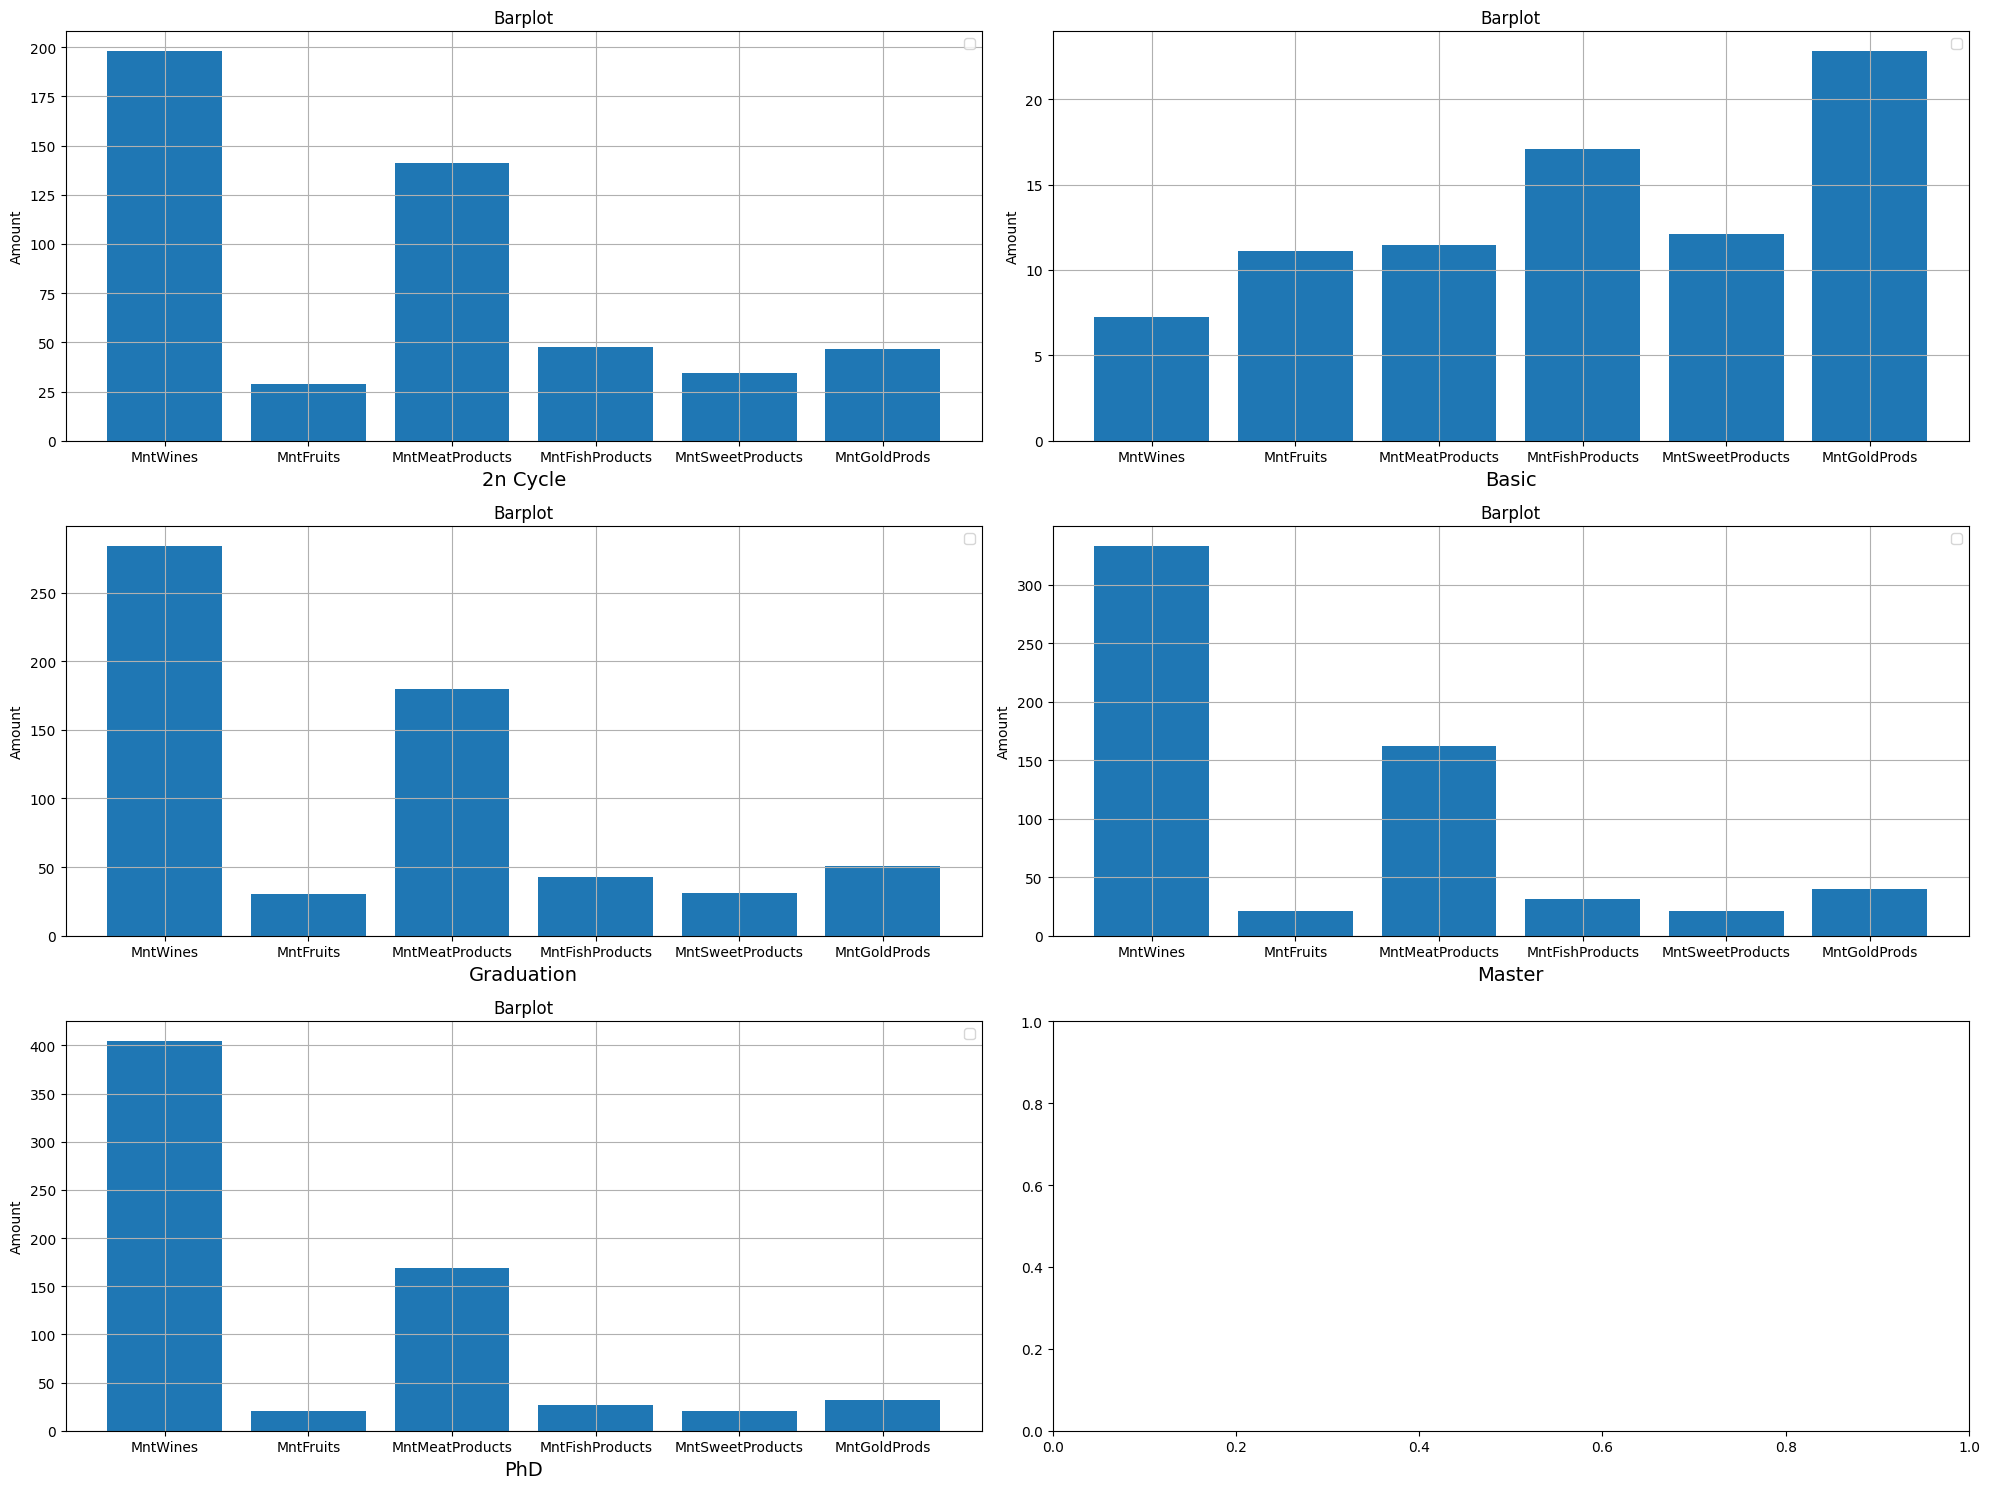

In [37]:
fig, axs = plt.subplots(3, 2, figsize=(20, 15))
axs = axs.flatten()

for i, edu_level in enumerate(df_edu.columns):
    axs[i].bar(df_edu[edu_level].index, df_edu[edu_level].values)
    axs[i].set_title('Barplot')
    axs[i].set_xlabel(edu_level, fontsize = 14)
    axs[i].set_ylabel('Amount')
    axs[i].grid()
    axs[i].legend()

plt.tight_layout()
plt.show()

In [38]:
# Распределение в процентном отношении

df_edu.transpose().apply(lambda row: row/row.sum(), axis = 1)

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Education,,,,,,
2n Cycle,0.40,0.06,0.28,0.10,0.07,0.09
Basic,0.09,0.14,0.14,0.21,0.15,0.28
Graduation,0.46,0.05,0.29,0.07,0.05,0.08
Master,0.55,0.04,0.27,0.05,0.03,0.07
PhD,0.60,0.03,0.25,0.04,0.03,0.05


Из примечательного:

1. Клиенты с PhD тратят больше всего денег (и по сравнению с другими клиентами в процентном отношении, и по сравнению с другими категориями) на вино, 60%;

2. Существенным образом отличается структура трат клиентов с базовым образованием, от клиентов с высшим. Клиенты с базовым образованием больше тратят (структурно, в процентном отношении) денег на фрукты, рыбу, сладости и золото, меньше -- на вино и мясо.

5. Женатые люди тратят больше или меньше денег на покупку золота?

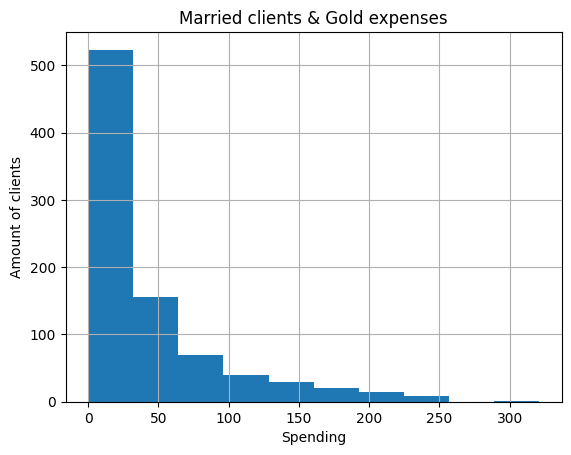

Средние траты на золото клиентов, состоящих в браке 42.82


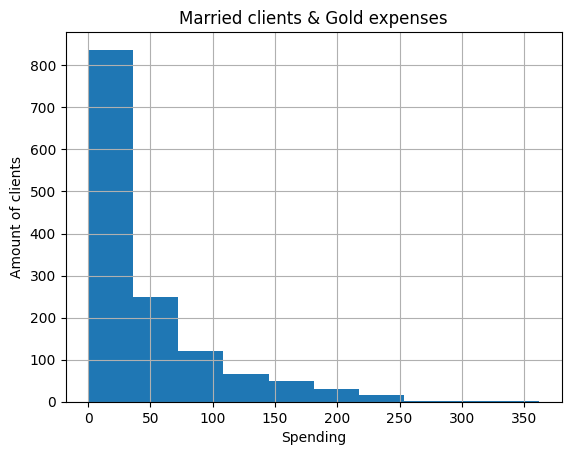

Средние траты на золото клиентов, не состоящих в браке 44.55


In [39]:
df[df['Marital_Status'] == 'Married']['MntGoldProds'].hist()
plt.title('Married clients & Gold expenses')
plt.xlabel('Spending')
plt.ylabel('Amount of clients')
plt.show()

print(f"Средние траты на золото клиентов, состоящих в браке {df[df['Marital_Status'] == 'Married']['MntGoldProds'].mean():.2f}")

df[df['Marital_Status'] != 'Married']['MntGoldProds'].hist()
plt.title('Married clients & Gold expenses')
plt.xlabel('Spending')
plt.ylabel('Amount of clients')
plt.show()

print(f"Средние траты на золото клиентов, не состоящих в браке {df[df['Marital_Status'] != 'Married']['MntGoldProds'].mean():.2f}")

Средние траты на золото у людей, не состояих в браке выше, выясним, является ли это различие статистически значимым.

Оказывается, что нет.

In [40]:
# Проверяем равенство дисперсий
print(f"{df[df['Marital_Status'] == 'Married']['MntGoldProds'].std():.2f}")
print(f"{df[df['Marital_Status'] != 'Married']['MntGoldProds'].std():.2f}")

51.93
52.02


In [41]:
alpha = .05

_, pvalue = stats.ttest_ind(df[df['Marital_Status'] == 'Married']['MntGoldProds'], 
                            df[df['Marital_Status'] != 'Married']['MntGoldProds'])

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.44526. Подтверждается нулевая гипотеза


Различие не оказывается статистически значимым.

6. Люди, которые покупают товар на сайте чаще берут что-то со скидкой?

Вопрос сформулирован не очень ясно -- я его дополню -- верно ли, что клиенты, для которых сайт является основным путём для покупок, чаще, чем остальные берут что-то со скидкой?

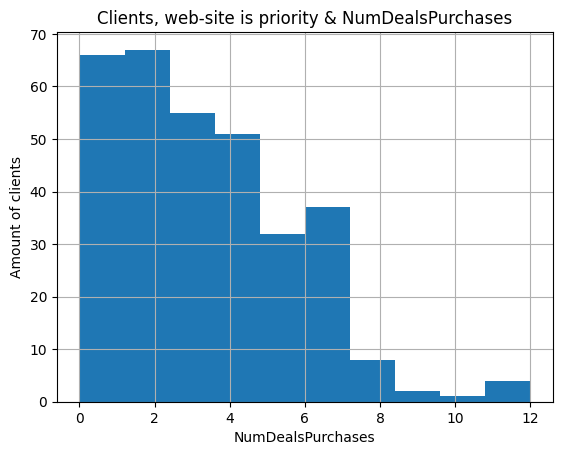

Среднее количество покупок со скидкой у клиентов, в основном пользующихся веб сайтом 3.40


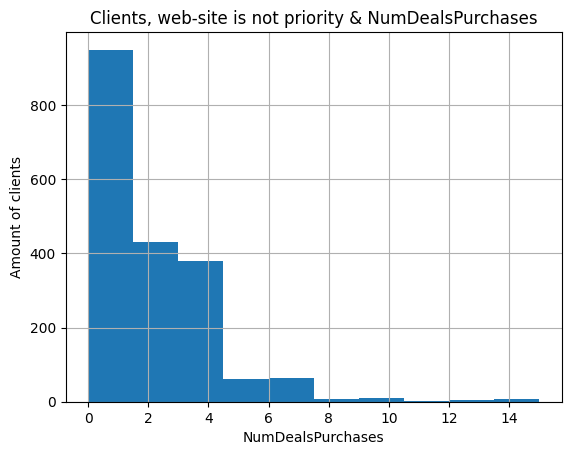

Среднее количество покупок со скидкой у клиентов, в основном пользующихся не веб сайтом 2.14


In [42]:
mask = (df['NumWebPurchases'] > df['NumStorePurchases']) & (df['NumWebPurchases'] > df['NumCatalogPurchases'])

df[mask]['NumDealsPurchases'].hist()
plt.title('Clients, web-site is priority & NumDealsPurchases')
plt.xlabel('NumDealsPurchases')
plt.ylabel('Amount of clients')
plt.show()

print(f"Среднее количество покупок со скидкой у клиентов, в основном пользующихся веб сайтом {df[mask]['NumDealsPurchases'].mean():.2f}")

df[~mask]['NumDealsPurchases'].hist()
plt.title('Clients, web-site is not priority & NumDealsPurchases')
plt.xlabel('NumDealsPurchases')
plt.ylabel('Amount of clients')
plt.show()

print(f"Среднее количество покупок со скидкой у клиентов, в основном пользующихся не веб сайтом {df[~mask]['NumDealsPurchases'].mean():.2f}")

Посмотрим, является ли это отличие статистически значимым. Оказывается, что да, клиенты, которые в основном пользуются веб-сайтом, действительно делают больше покупок со скидкой.

In [43]:
alpha = .05

_, pvalue = stats.ttest_ind(df[mask]['NumDealsPurchases'], 
                            df[~mask]['NumDealsPurchases'])

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


7. Зависит ли жалоба клиента от его трат?

Посмотрим сначала, зависит ли жалоба от дохода, а затем от трат.

In [44]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age'],
      dtype='object')

In [45]:
# Мы видим, что пожаловавшихся клиентов ~ 1% от всего датасета. Посмотрим на отличительные характеристики этих клиентов.
df['Complain'].value_counts()

Complain
0    2215
1      21
Name: count, dtype: int64

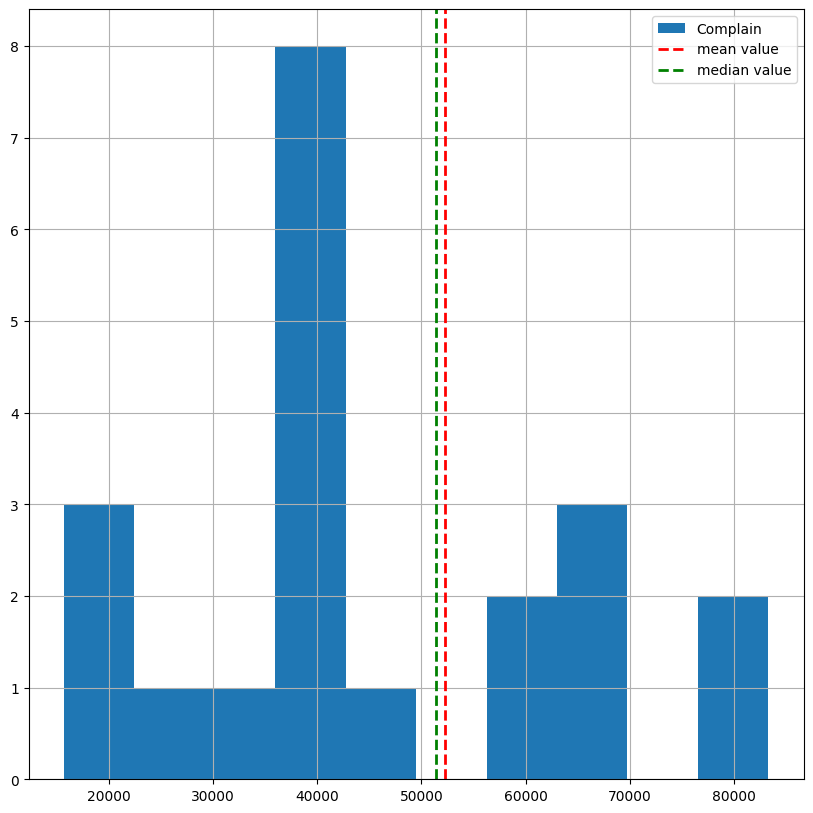

In [46]:
plt.figure(figsize = (10, 10))
plt.hist(df[df['Complain'] == 1]['Income'], label='Complain')
plt.axvline(df['Income'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean value')
plt.axvline(df['Income'].median(), color='g', linestyle='dashed', linewidth=2, label = 'median value')
plt.grid()
plt.legend()
plt.show()

Большинство жалоб (14 из 21) поступило от клиентов с доходом ниже среднего.

In [47]:
df_complain = df.copy()
df_complain['sum_expenses'] = 0

for category in cat_items:
    df_complain['sum_expenses'] += df_complain[category]

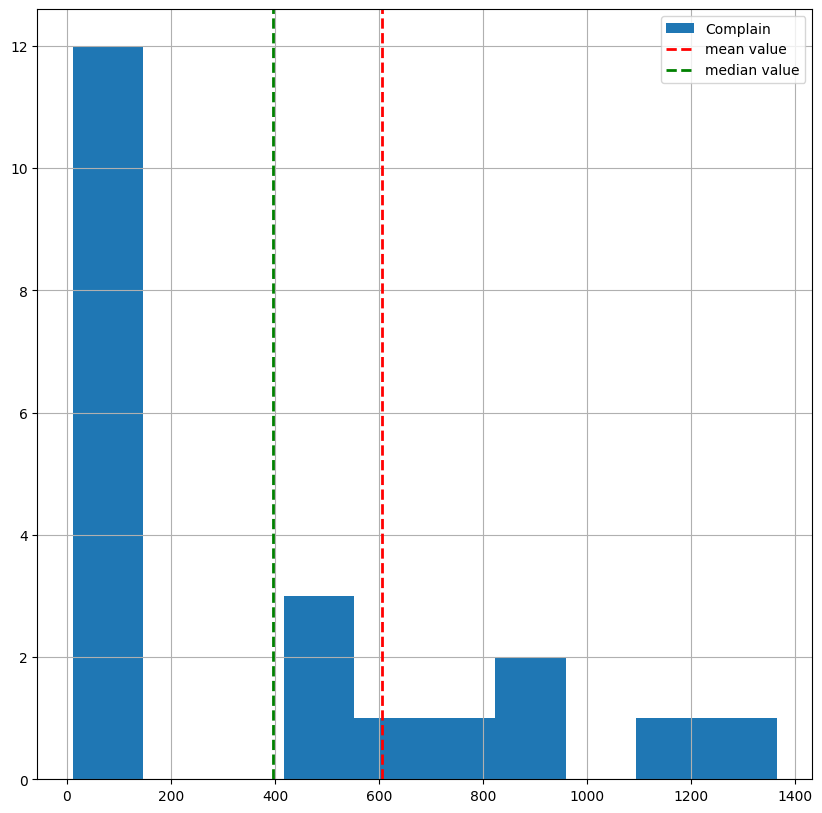

In [48]:
plt.figure(figsize = (10, 10))
plt.hist(df_complain[df_complain['Complain'] == 1]['sum_expenses'], label='Complain')
plt.axvline(df_complain['sum_expenses'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean value')
plt.axvline(df_complain['sum_expenses'].median(), color='g', linestyle='dashed', linewidth=2, label = 'median value')
plt.grid()
plt.legend()
plt.show()

In [49]:
display(df_complain[df_complain['Complain'] == 1]['sum_expenses'].sort_values())
(df_complain[df_complain['Complain'] == 1]['sum_expenses'] < df_complain['sum_expenses'].mean()).sum()

1720      11
78        18
2018      21
147       22
355       49
1041      54
1571      54
271       60
192       65
590       81
972       92
1277      99
1323     473
1180     504
1211     545
1461     637
1201     758
358      900
1069     906
1924    1191
1850    1365
Name: sum_expenses, dtype: int64

15

Большинство жалоб (15 из 21) поступило от клиентов с тратами в магазине ниже среднего.

8. Люди, принявшие предложение о покупке лишь в последней компании тратят больше, чем люди, принявшие сразу предложение первой компании?

In [50]:
# Будем использовать датасет df_complain
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age'],
      dtype='object')

In [51]:
companies = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']
mask_1 = df['AcceptedCmp1'] == 1
mask_2 = df['Response'] == 1

for cmp in companies:
    mask_2 *= (df[cmp] == 0)

In [52]:
display(f"Количество клиентов в первой выборке {df[mask_1].shape[0]}")
display(f"Количество клиентов во второй выборке {df[mask_2].shape[0]}")

'Количество клиентов в первой выборке 143'

'Количество клиентов во второй выборке 145'

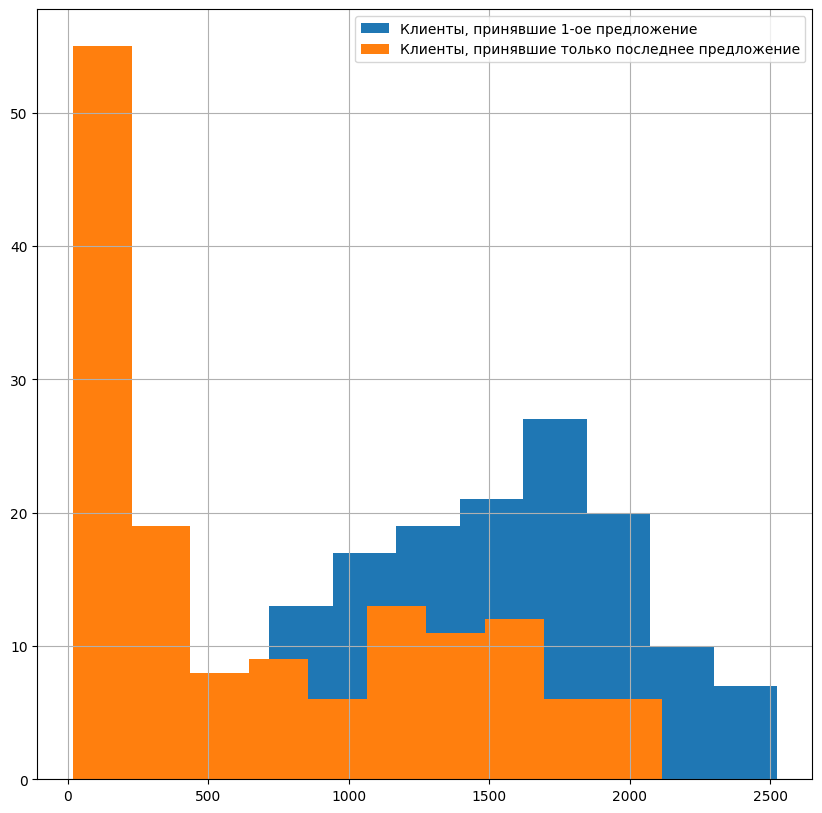

In [53]:
plt.figure(figsize = (10, 10))
plt.hist(df_complain[mask_1]['sum_expenses'], label='Клиенты, принявшие 1-ое предложение')
plt.hist(df_complain[mask_2]['sum_expenses'], label='Клиенты, принявшие только последнее предложение')
plt.grid()
plt.legend()
plt.show()

In [54]:
print(f"Траты клиентов, сразу принявших первое предложение {df_complain[mask_1]['sum_expenses'].mean():.2f}")
print(f"Траты клиентов, сразу принявших только последнее предложение {df_complain[mask_2]['sum_expenses'].mean():.2f}")

Траты клиентов, сразу принявших первое предложение 1484.08
Траты клиентов, сразу принявших только последнее предложение 699.72


Отличие значительно, в качестве формальности проверим его статистическую значимость. Отличие статистически значимо.

In [55]:
alpha = .05

_, pvalue = stats.ttest_ind(df_complain[mask_1]['sum_expenses'], 
                            df_complain[mask_2]['sum_expenses'])

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


Итоговый вывод. Соберём все ответы в одно место.

1. Сколько в среднем клиенты тратят на каждый тип товара? На какой товар надо сделать акцент? <br>
Ответ длинный, см. соответствующий раздел.

2. Какой средний возраст покупателя? Зависит ли возраст клиента от его покупок во всех категориях?
Средний возраст 45.2 +- 12.0 лет. Связь возраста со структурой покупок см. в соответствующем разделе. <br>

3. Тратят ли клиент больше денег, если у него много детей и иждивенцев? <br>
Нет, такие клиенты напротив, тратят меньше.

4. Зависят ли покупки от образования? Что предпочитают люди чаще покупать в зависимости от образования? <br>
В целом структура трат зависит только от наличия/отсутствия высшего образования, подробности см. в соответствующем разделе.

5. Женатые люди тратят больше или меньше денег на покупку золота? <br>
Статистически значимой разницы нет.

6. Люди, которые покупают товар на сайте чаще берут что-то со скидкой? <br>
Да, клиенты, которые в основном пользуются веб-сайтом, действительно делают больше покупок со скидкой.

7. Зависит ли жалоба клиента от его трат? <br>
Да, большинство жалоб (15 из 21) поступило от клиентов с тратами в магазине ниже среднего.

8. Люди, принявшие предложение о покупке лишь в последней компании тратят больше, чем люди, принявшие сразу предложение первой компании?<br>
Траты клиентов, сразу принявших первое предложение, больше примерно в 2 раза.


### ЗАДАНИЕ ПРО

1. Разбейте данные на несколько выборок: по образованию, по уровню заработка и по семейному статусу. Опишите все эти выборки и скажите — отличаются ли они между собой? Опишите общие закономерности для каждого типа — на что чаще тратит женатый человек и жалуется ли он? Люди с PhD покупают фрукты? И тд
2. Разбейте данные на две выборки — по сумме трат каждого товара: 1 — больше медианы трат, 0 — меньше. Сравните выборки между собой и сделайте вывод — на кого надо опираться при модификации товаров магазинам?
3. Проведите дополнительный анализ, который поможет дать больше информации для заказчика.

1. Разбейте данные на несколько выборок: по образованию, по уровню заработка и по семейному статусу. Опишите все эти выборки и скажите — отличаются ли они между собой? Опишите общие закономерности для каждого типа — на что чаще тратит женатый человек и жалуется ли он? Люди с PhD покупают фрукты? И тд

Мы уже делали разбиение по образованию выше, сделаем аналогичные разбиения по уровню заработка и семейному статусу.
<br>
Из интересных критериев сравнения:

1. Структура трат;
2. Распределение по уровню заработка для клиентов с различным семейным статусом;
3. Мы выяснили структуру жалоб по заработку/тратам клиентов, посмотрим на их структуру по семейному статусу.

In [56]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age'],
      dtype='object')

In [57]:
# Сделаем всё-таки колонку с суммарными тратами
df['sum_exp'] = df[[*cat_items]].sum(axis = 1)

In [58]:
# Статистика по заработку и тратам
df_mar = df.groupby('Marital_Status')[['Income', 'sum_exp', ]].mean()
df_mar

,Income,sum_exp
Marital_Status,,
Divorced,52834.23,610.63
Married,51722.20,590.80
Single,50957.79,604.31
Together,53223.04,608.39
Widow,56415.32,738.82


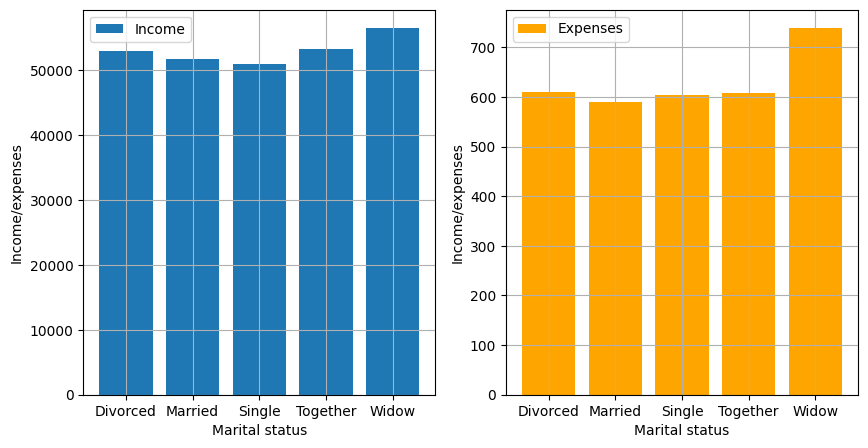

In [59]:
df_mar = df.groupby('Marital_Status')[['Income', 'sum_exp']].mean()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))


axs[0].bar(df_mar['Income'].index, df_mar['Income'].values, label = 'Income')
axs[0].set_xlabel('Marital status')
axs[0].set_ylabel('Income/expenses')
axs[0].legend()
axs[0].grid()

axs[1].bar(df_mar['sum_exp'].index, df_mar['sum_exp'].values, label = 'Expenses', color='orange')
axs[1].set_xlabel('Marital status')
axs[1].set_ylabel('Income/expenses')
axs[1].legend()
axs[1].grid()


Мы видим, что у вдовцов траты и заработки немного выше, у остальных категорий значения очень близки.

In [60]:
# Статистика по жалобам

# Абсолютные значения
display(df[df['Complain'] == 1]['Marital_Status'].value_counts())

# Относительные значения

100*df.groupby('Marital_Status')['Complain'].mean()


Marital_Status
Married     8
Single      6
Together    5
Divorced    2
Name: count, dtype: int64

Marital_Status
Divorced   0.86
Married    0.93
Single     1.24
Together   0.86
Widow      0.00
Name: Complain, dtype: float64

Мы видим, что больше всего жалоб (по абсолютному числу -- 8) было от женатых людей, но в процентном отношении чаще жаловались одинокие клиенты (1.24% от всех одиноких клиентов пожаловались). 

/tmp/ipykernel_6706/1046491253.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[i].legend()


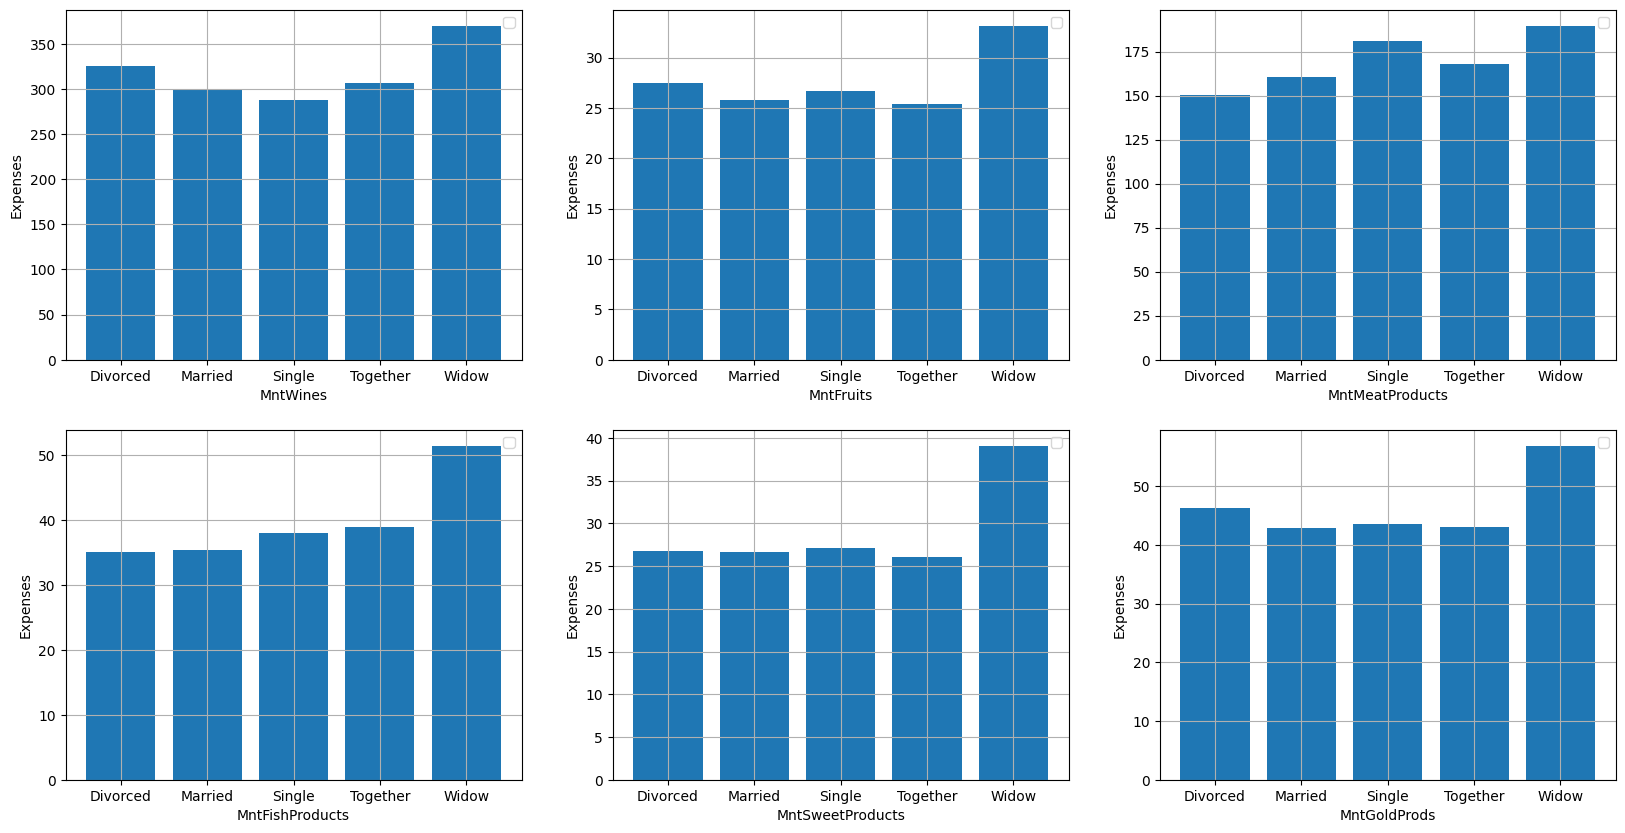

In [61]:
# Структура трат

df_fam_struc = df.groupby('Marital_Status')[[*cat_items]].mean()

# Траты по категориям в зависимости от семейного статуса

fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs = axs.flatten()

for i, param in enumerate(cat_items):
    axs[i].bar(df_fam_struc[param].index, height = df_fam_struc[param].values)
   
    axs[i].set_xlabel(param)
    axs[i].set_ylabel('Expenses')
    axs[i].grid()
    axs[i].legend()

По этим распределениям можно сделать много выводов, в зависимости от запроса заказчика, одни из самых интересных:

1. Мы видим, что во всех категориях по тратам лидируют вдовые клиенты;
2. Разведённые и вдовцы тратят больше всего денег на золото;
3. Одинокие клиенты меньше тратят денег на вино;
4. У вдовцов заметно выше траты на сладости, у клиентов с другим семейным статусом они примерно одинаковые;
5. Одинокие и вдовые клиенты тратят больше всех денег на мясо.

Однако эти гипотезы перед использованием лучше перепроверить с помощью t-теста.

In [62]:
# Структура трат по семейному статусу
100*df_fam_struc.apply(lambda x: x/x.sum(), axis = 1)

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Marital_Status,,,,,,
Divorced,53.20,4.49,24.60,5.74,4.39,7.58
Married,50.69,4.36,27.20,5.99,4.52,7.25
Single,47.61,4.42,29.97,6.29,4.49,7.22
Together,50.43,4.17,27.63,6.41,4.29,7.07
Widow,49.98,4.48,25.62,6.96,5.28,7.68


2. Разбейте данные на две выборки — по сумме трат каждого товара: 1 — больше медианы трат, 0 — меньше. Сравните выборки между собой и сделайте вывод — на кого надо опираться при модификации товаров магазинам?

В данном пункте интересно составить портрет среднестатистического клиента по категориям с тратами выше среднего. Здесь можно проводить очень много анализа по каждой категории продуктов и фичам клиентов, для примера разберём траты в категории Вино и определим клиенты какого семейного статуса и образования тратят больше всего денег в этой категории.

In [63]:
for category in cat_items:
    df[f'{category}_median'] = 1*(df[category] >= df[category].median())

In [64]:
# Аналитика на примере винной продукции. Семейное положение
print('Общее распределение')
display(df['Marital_Status'].value_counts(normalize=True))

print('Распределение клиентов с тратами выше медианной по категории Вино')
display(df[df['MntWines_median'] == 1]['Marital_Status'].value_counts(normalize=True))

print('Распределение клиентов с тратами ниже медианной по категории Вино')
df[df['MntWines_median'] == 0]['Marital_Status'].value_counts(normalize=True)

Общее распределение


Marital_Status
Married    0.39
Together   0.26
Single     0.22
Divorced   0.10
Widow      0.03
Name: proportion, dtype: float64

Распределение клиентов с тратами выше медианной по категории Вино


Marital_Status
Married    0.39
Together   0.26
Single     0.20
Divorced   0.11
Widow      0.04
Name: proportion, dtype: float64

Распределение клиентов с тратами ниже медианной по категории Вино


Marital_Status
Married    0.39
Together   0.26
Single     0.23
Divorced   0.10
Widow      0.03
Name: proportion, dtype: float64

In [65]:
# Аналитика на примере винной продукции. Образование
print('Общее распределение')
display(df['Education'].value_counts(normalize=True))

print('Распределение клиентов с тратами выше медианной по категории Вино')
display(df[df['MntWines_median'] == 1]['Education'].value_counts(normalize=True))

print('Распределение клиентов с тратами ниже медианной по категории Вино')
df[df['MntWines_median'] == 0]['Education'].value_counts(normalize=True)

Общее распределение


Education
Graduation   0.50
PhD          0.22
Master       0.17
2n Cycle     0.09
Basic        0.02
Name: proportion, dtype: float64

Распределение клиентов с тратами выше медианной по категории Вино


Education
Graduation   0.52
PhD          0.25
Master       0.17
2n Cycle     0.07
Basic        0.00
Name: proportion, dtype: float64

Распределение клиентов с тратами ниже медианной по категории Вино


Education
Graduation   0.49
PhD          0.18
Master       0.16
2n Cycle     0.11
Basic        0.05
Name: proportion, dtype: float64

Таким образом, мы видим, что среднестатистический клиент, тратящий на вино больше медианного значения состоит в браке и имеет высшее образование. Посмотрим на суммарные траты по семейному положению (что сильно коррелирует с фичами просто среднестатистического клиента). Также высокая доля трат на вино и специфика продуктов позволяет предположить, что это магазин, специализирующийся на вине.

In [66]:
display(df.groupby('Marital_Status')['MntWines'].sum().sort_values(ascending=False))
display(df.groupby('Education')['MntWines'].sum().sort_values(ascending=False))

Marital_Status
Married     258751
Together    177959
Single      138953
Divorced     75364
Widow        28434
Name: MntWines, dtype: int64

Education
Graduation    319900
PhD           195941
Master        122998
2n Cycle       40231
Basic            391
Name: MntWines, dtype: int64

Мы видим, что больше всего продаж вина осуществляется клиентам состоящим в браке/отношениях с высшим образованием.

3. Проведите дополнительный анализ, который поможет дать больше информации для заказчика.

В качестве дополнительного анализа рассмотрим соотношение траты/заработок. Нас интересуют клиенты с соотношением траты/заработок ниже среднего. Как можно простимулировать этих клиентов тратить в магазине больше и какова их привычная структура покупок?

In [67]:
# Мы видим, что клиенты тратят в среднем ~ 1% от своего заработка в магазине

df['spend/income'] = df['sum_exp']/df['Income']
display(100*df['spend/income'].mean())
df['spend/income_avg'] = 1*(df['spend/income'] > df['spend/income'].mean())

0.9902302218804645

In [68]:
# Клиенты, тратящие в среднем больше денег от своего заработка, доход

print(f"{df[df['spend/income_avg'] == 1]['Income'].mean():.2f}")
print(f"{df[df['spend/income_avg'] == 0]['Income'].mean():.2f}")

67713.27
40311.85


In [69]:
# Клиенты, тратящие в среднем больше денег от своего заработка, суммарные траты

print(f"{df[df['spend/income_avg'] == 1]['sum_exp'].mean():.2f}")
print(f"{df[df['spend/income_avg'] == 0]['sum_exp'].mean():.2f}")

1182.69
161.54


In [70]:
display(100*df[df['spend/income_avg'] == 1]['Marital_Status'].value_counts(normalize=True))
display(100*df[df['spend/income_avg'] == 0]['Marital_Status'].value_counts(normalize=True))
display(100*df['Marital_Status'].value_counts(normalize=True))

Marital_Status
Married    37.04
Together   26.54
Single     21.19
Divorced   10.80
Widow       4.42
Name: proportion, dtype: float64

Marital_Status
Married    39.87
Together   25.47
Single     21.91
Divorced   10.05
Widow       2.69
Name: proportion, dtype: float64

Marital_Status
Married    38.64
Together   25.94
Single     21.60
Divorced   10.38
Widow       3.44
Name: proportion, dtype: float64

In [71]:
display(100*df[df['spend/income_avg'] == 1]['Education'].value_counts(normalize=True))
display(100*df[df['spend/income_avg'] == 0]['Education'].value_counts(normalize=True))
display(100*df['Education'].value_counts(normalize=True))

Education
Graduation   52.57
PhD          23.05
Master       15.95
2n Cycle      7.82
Basic         0.62
Name: proportion, dtype: float64

Education
Graduation   48.66
PhD          20.57
Master       16.93
2n Cycle     10.05
Basic         3.80
Name: proportion, dtype: float64

Education
Graduation   50.36
PhD          21.65
Master       16.50
2n Cycle      9.08
Basic         2.42
Name: proportion, dtype: float64

In [72]:
df.groupby('Marital_Status')['spend/income_avg'].mean().sort_values(ascending=False)

Marital_Status
Widow      0.56
Divorced   0.45
Together   0.44
Single     0.43
Married    0.42
Name: spend/income_avg, dtype: float64

In [73]:
df.groupby('Education')['spend/income_avg'].mean().sort_values(ascending=False)

Education
PhD          0.46
Graduation   0.45
Master       0.42
2n Cycle     0.37
Basic        0.11
Name: spend/income_avg, dtype: float64

In [74]:
df.groupby('Education')[['Income', 'sum_exp']].mean()

,Income,sum_exp
Education,,
2n Cycle,47688.58,496.53
Basic,20306.26,81.80
Graduation,52683.74,619.37
Master,52862.66,610.27
PhD,56127.97,673.44


df.groupby(')